In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('RestaurantData_Train.csv')

In [3]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [4]:
df[["VOTES","nouse"]] = (df["VOTES"]).str.split(' ',1,expand=True)

In [5]:
df.drop('nouse',inplace=True,axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [7]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [8]:
df.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

In [9]:
df.describe()

,RESTAURANT_ID,COST
count,12690.000000,12690.000000
mean,7759.134121,655.252246
std,4504.874150,627.003540
min,0.000000,20.000000
25%,3863.250000,300.000000
50%,7740.000000,500.000000
75%,11688.750000,800.000000
max,15573.000000,14000.000000


In [10]:
df['LOCALITY'].unique()

array(['Dombivali East', 'Ramapuram', 'Saligramam', ..., 'Market Road',
       'Near Perambur', 'Near Malviya Nagar'], dtype=object)

In [11]:
df['CUISINES'].unique()

array(['Malwani, Goan, North Indian', 'Asian, Modern Indian, Japanese',
       'North Indian, Chinese, Biryani, Hyderabadi', ...,
       'North Indian, Burger, Kebab', 'Goan, Continental',
       'Finger Food, Continental, Asian, Chinese'], dtype=object)

In [12]:
df.drop('TITLE',axis=1,inplace=True)

In [13]:
df.drop('TIME',axis=1,inplace=True)

In [14]:
df.drop('CITY',axis=1,inplace=True)

In [15]:
mode=df['LOCALITY'].mode()
mode

0    Gachibowli
dtype: object

In [16]:
df['LOCALITY'].fillna(mode[0],inplace=True)

In [17]:
df['RATING'].replace('-',np.nan,inplace=True)
df['RATING'].replace('NEW',np.nan,inplace=True)

In [18]:
mode=df['RATING'].mode()
mode

0    3.9
dtype: object

In [19]:
df['RATING'].fillna(mode[0],inplace=True)

In [20]:
mode=df['VOTES'].mode()
mode

0    44
dtype: object

In [21]:
df['VOTES'].fillna(mode[0],inplace=True)

In [22]:
df.isnull().sum()

RESTAURANT_ID    0
CUISINES         0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['CUISINES'] = le.fit_transform(df['CUISINES']) 
df['LOCALITY'] = le.fit_transform((df['LOCALITY']).astype(str)) 

In [24]:
df.dropna(how='any',inplace=True)

In [25]:
df['RATING'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', '3.1', '2.5', '4.6',
       '2.8', '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4', '2.3',
       '2.0', '2.1', '2.2'], dtype=object)

In [26]:
df['RATING']=pd.to_numeric((df['RATING']).astype(str))

In [27]:
df.head()

,RESTAURANT_ID,CUISINES,LOCALITY,RATING,VOTES,COST
0,9438,2627,285,3.6,49,1200
1,13198,289,1046,4.2,30,1500
2,10915,2976,1101,3.8,221,800
3,6346,4130,136,4.1,24,800
4,15387,1766,620,3.8,165,300


In [28]:
df.isna().any()

RESTAURANT_ID    False
CUISINES         False
LOCALITY         False
RATING           False
VOTES            False
COST             False
dtype: bool

In [29]:
df["VOTES"].unique()

array(['49', '30', '221', ..., '2723', '1426', '1214'], dtype=object)

In [30]:
df['VOTES']=pd.to_numeric((df['VOTES']).astype(str))#trying to slice and change dtype, then i got an exceptional entry

In [62]:
dfcor=df.corr()
dfcor

,RESTAURANT_ID,CUISINES,LOCALITY,RATING,VOTES,COST
RESTAURANT_ID,1.000000,0.056239,-0.004242,0.029293,0.000403,0.040710
CUISINES,0.056239,1.000000,0.016504,-0.062395,-0.035323,-0.014078
LOCALITY,-0.004242,0.016504,1.000000,-0.027201,-0.028965,-0.015050
RATING,0.029293,-0.062395,-0.027201,1.000000,0.332369,0.308018
VOTES,0.000403,-0.035323,-0.028965,0.332369,1.000000,0.255723
COST,0.040710,-0.014078,-0.015050,0.308018,0.255723,1.000000


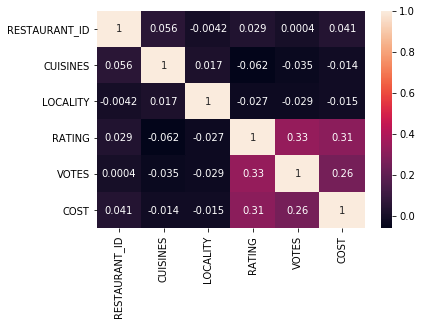

In [63]:
sns.heatmap(dfcor,annot=True)# RATING and VOTES are both positively related to cost which implies restaurants with higher ratings and votes have higher COST

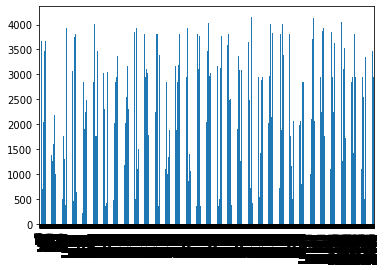

In [31]:
df['CUISINES'].plot.bar()

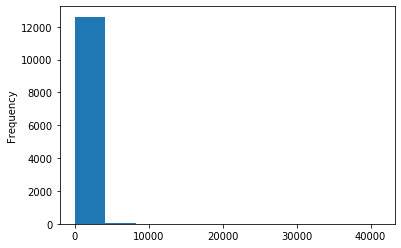

In [32]:
df['VOTES'].plot.hist()

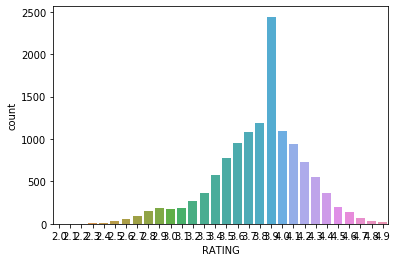

In [33]:
sns.countplot(df['RATING'])

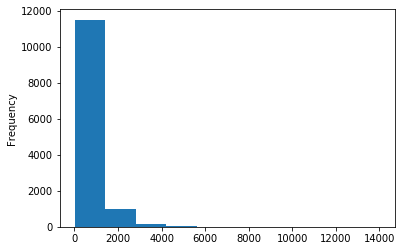

In [34]:
df['COST'].plot.hist()

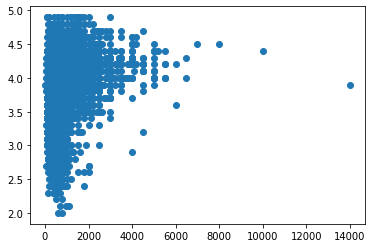

In [35]:
plt.scatter(df['COST'],df['RATING'])#Some sort of posiitve relationship exist here

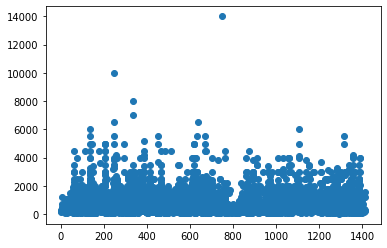

In [36]:
plt.scatter(df['LOCALITY'],df['COST'])# no defined relationship here

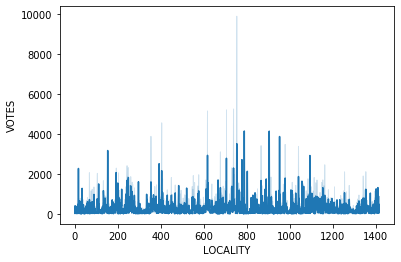

In [37]:
sns.lineplot(x='LOCALITY',y='VOTES',data=df)# no significant relationship here

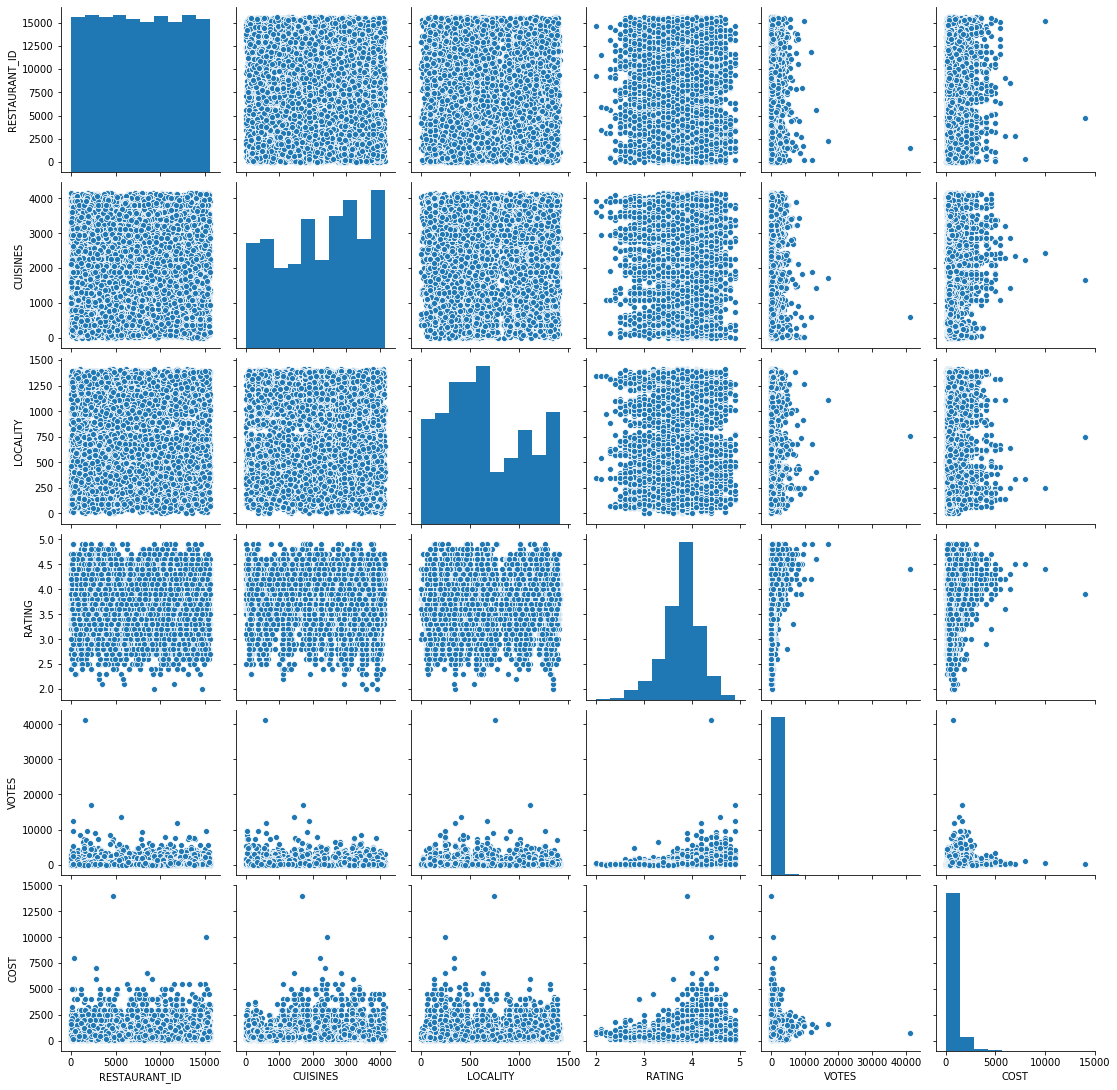

In [38]:
sns.pairplot(df)

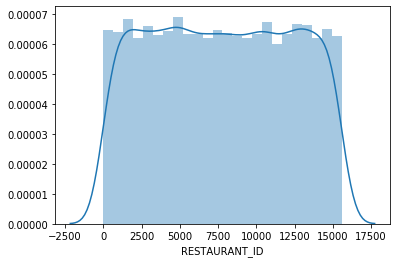

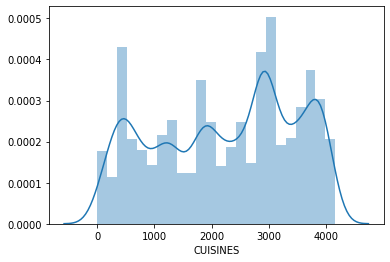

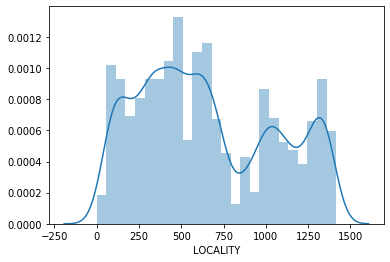

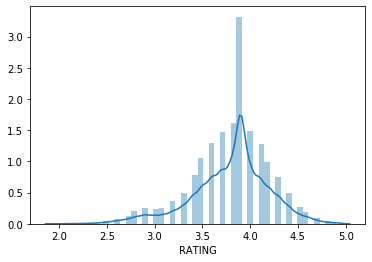

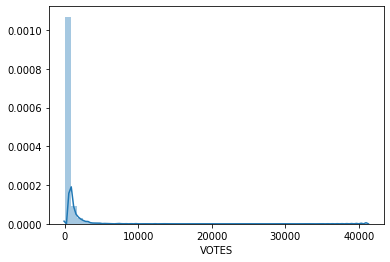

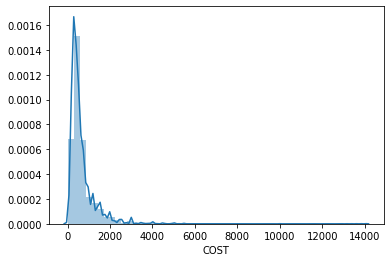

In [39]:
for i in df.describe().columns:
    sns.distplot(df[i])
    plt.show()

In [40]:
collist=df.columns.values
ncol=6
nrows=2

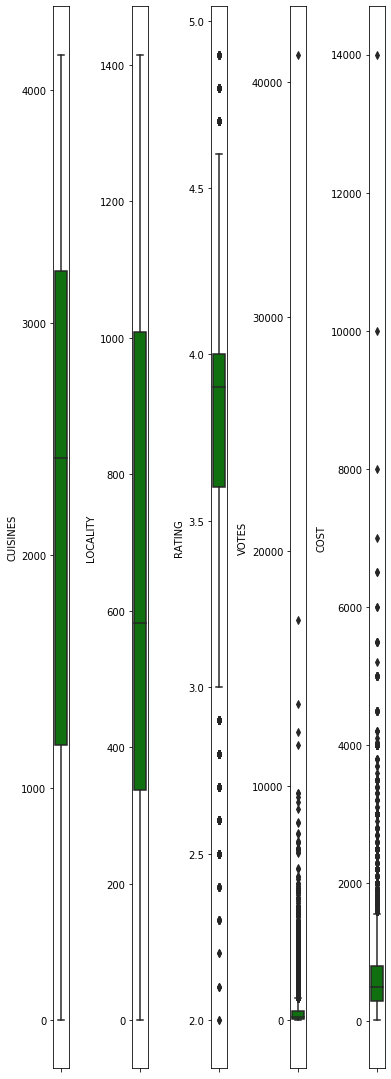

In [41]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()#outliers exists

In [42]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df1=df.loc[(z_score<3).all(axis=1)]
print(df1.shape)

(12690, 6)
(12200, 6)


In [43]:
df1.skew()

RESTAURANT_ID    0.012791
CUISINES        -0.214221
LOCALITY         0.350401
RATING          -0.510343
VOTES            2.598752
COST             1.821008
dtype: float64

In [44]:
VOTES_sqrt=np.sqrt(df1['VOTES'])
VOTES_sqrt.skew()

1.3288161393567253

In [45]:
COST_sqrt=np.sqrt(df1['COST'])
COST_sqrt.skew()

1.0204498503234092

In [48]:
#seperating my input and output variables
x=df1.iloc[:,0:-1]
x.head()

,RESTAURANT_ID,CUISINES,LOCALITY,RATING,VOTES
0,9438,2627,285,3.6,49
1,13198,289,1046,4.2,30
2,10915,2976,1101,3.8,221
3,6346,4130,136,4.1,24
4,15387,1766,620,3.8,165


In [49]:
y=pd.DataFrame(df1['VOTES'])
y.head()

,VOTES
0,49
1,30
2,221
3,24
4,165


In [52]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df1)
x=pd.DataFrame(x,columns=df1.columns)

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=76,test_size=0.24)

In [54]:
x_train.shape,x_test.shape

((9272, 6), (2928, 6))

In [55]:
y_train.shape,y_test.shape

((9272, 1), (2928, 1))

In [56]:
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
lm = LinearRegression()
def maxr2_score(lm,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.24)
        lm=LinearRegression()
        lm.fit(x_train,y_train)
        y_pred=lm.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print('r2_score corresponding to random state; ',r_state,' is: ',r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state

    print('max r2 score corresponding to ',final_r_state,' is ',max_r_score)
maxr2_score(lm, x,y)

r2_score corresponding to random state;  42  is:  1.0
r2_score corresponding to random state;  43  is:  1.0
r2_score corresponding to random state;  44  is:  1.0
r2_score corresponding to random state;  45  is:  1.0
r2_score corresponding to random state;  46  is:  1.0
r2_score corresponding to random state;  47  is:  1.0
r2_score corresponding to random state;  48  is:  1.0
r2_score corresponding to random state;  49  is:  1.0
r2_score corresponding to random state;  50  is:  1.0
r2_score corresponding to random state;  51  is:  1.0
r2_score corresponding to random state;  52  is:  1.0
r2_score corresponding to random state;  53  is:  1.0
r2_score corresponding to random state;  54  is:  1.0
r2_score corresponding to random state;  55  is:  1.0
r2_score corresponding to random state;  56  is:  1.0
r2_score corresponding to random state;  57  is:  1.0
r2_score corresponding to random state;  58  is:  1.0
r2_score corresponding to random state;  59  is:  1.0
r2_score corresponding to ra

In [57]:
#final model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=80,test_size=0.20)
lm=linear_model.LinearRegression()
lm.fit(x_train,y_train)
y_pred=lm.predict(x_test)

In [58]:
#using cross validation to check over/under fitting
from sklearn.model_selection import cross_val_score
a_score=cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring="r2")
a_score

array([1., 1., 1., 1., 1.])

In [59]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('RMSE is: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score: ',r2_score(y_test,y_pred))

RMSE is:  3.525215253387138e-13
r2_score:  1.0


In [60]:
#saving the model
from sklearn.externals import joblib
filename='restaurant_foodfile.obj'

In [61]:
joblib.dump(lm,'restaurant_foodfile.obj')

['restaurant_foodfile.obj']